<a href="https://colab.research.google.com/github/EnilaLeme/Desafio---Curso-de-Data-Science/blob/main/Controle_da_polui%C3%A7%C3%A3o_do_ar_na_cidade_de_Seoul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Desafio do final de semana: Dados de controle da poluição do ar na cidade Seoul - Coréia do Sul - Data Wrangling, Estatísticas e Visualizações
---

- Contexto:

Este conjunto de dados trata das informações de medição da poluição do ar em Seul, na Coreia do Sul.
O Governo Metropolitano de Seoul fornece muitos dados públicos, incluindo informações sobre poluição do ar, por meio do 'Open Data Plaza'

- Dados:

Esses dados fornecem valores médios para seis poluentes (SO2, NO2, CO, O3, PM10, PM2,5).

Os dados foram medidos a cada hora entre 2017 e 2019.
Os dados foram medidos para 25 distritos em Seuol.
Este conjunto de dados está dividido em três arquivos.
Informações de medição: informações de medição de poluição do ar

A medição média de 1 hora é fornecida após a calibração.

Status do instrumento:

0: Normal,

1: Necessidade de calibração,

2: Anormal

4: Corte de energia,

8: Em reparo,

9: Dados anormais

Informações do item de medição: informações sobre itens de medição de poluição do ar

Informações da estação de medição: informações sobre estações de instrumentos de poluição do ar

In [ ]:
Realize as seguintes análises
0 - Construa uma base única em tidy format (Data Wrangling - Realize transformações de dados).
1 - Construa um gráfico diário dos índices médios SO2 da estação "Jongno-gu".
2 - Construa um gráfico mensal dos índices médios O3 da estação "Dongdaemun-gu".
3 - Construa um gráfico de barras com o ranking dos índices médios de SO2 por estação.
4 - Construa um boxplot da estação "Dobong-gu" dos indices médios de NO2 de acordo com o alerta (azul, verde, amarelo e vermelho)
5 - Construa resumos estatísticos da base única dos anos de 2017, 2018 e 2019.

In [ ]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
# Entrada de dados:
df1 = pd.read_csv('Measurement_info.csv')
df2 = pd.read_csv('Measurement_item_info.csv')
df3 = pd.read_csv('Measurement_station_info.csv')

In [ ]:
# Verificação dos dados:
display(df1.head(100))
display(df2)
display(df3)

,Measurement date,Station code,Item code,Average value,Instrument status
0,2017-01-01 00:00,101,1,0.004,0
1,2017-01-01 00:00,101,3,0.059,0
2,2017-01-01 00:00,101,5,1.200,0
3,2017-01-01 00:00,101,6,0.002,0
4,2017-01-01 00:00,101,8,73.000,0
...,...,...,...,...,...
95,2017-01-01 00:00,116,9,65.000,0
96,2017-01-01 00:00,117,1,0.007,0
97,2017-01-01 00:00,117,3,0.045,0
98,2017-01-01 00:00,117,5,1.300,0


,Item code,Item name,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red)
0,1,SO2,ppm,0.02,0.05,0.15,1.0
1,3,NO2,ppm,0.03,0.06,0.20,2.0
2,5,CO,ppm,2.00,9.00,15.00,50.0
3,6,O3,ppm,0.03,0.09,0.15,0.5
4,8,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0
5,9,PM2.5,Mircrogram/m3,15.00,35.00,75.00,500.0


,Station code,Station name(district),Address,Latitude,Longitude
0,101,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
1,102,Jung-gu,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676
2,103,Yongsan-gu,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.004850
3,104,Eunpyeong-gu,"215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...",37.609823,126.934848
4,105,Seodaemun-gu,"32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...",37.593742,126.949679
5,106,Mapo-gu,"10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...",37.555580,126.905597
6,107,Seongdong-gu,"18, Ttukseom-ro 3-gil, Seongdong-gu, Seoul, Re...",37.541864,127.049659
7,108,Gwangjin-gu,"571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...",37.547180,127.092493
8,109,Dongdaemun-gu,"43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul...",37.575743,127.028885
9,110,Jungnang-gu,"369, Yongmasan-ro, Jungnang-gu, Seoul, Republi...",37.584848,127.094023


In [ ]:
# Verificando as informações das bases:
df1.info() 
df2.info() 
df3.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3885066 entries, 0 to 3885065
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Measurement date   object 
 1   Station code       int64  
 2   Item code          int64  
 3   Average value      float64
 4   Instrument status  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 148.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item code            6 non-null      int64  
 1   Item name            6 non-null      object 
 2   Unit of measurement  6 non-null      object 
 3   Good(Blue)           6 non-null      float64
 4   Normal(Green)        6 non-null      float64
 5   Bad(Yellow)          6 non-null      float64
 6   Very bad(Red)        6 non-null      float64
dtypes: float64(4), int64(1), object(2)
memory usa

In [ ]:
# Traduzindo os nomes das colunas:
df1.columns = ['Data_de_medicao', 'Codigo_da_estacao', 'Codigo_do_item', 'Valor_medio', 'Status_do_instrumento']

df2.columns = ['Codigo_do_item', 'Nome_do_item', 'Unidade_de_medida', 'Bom_azul', 'Normal_verde', 'Ruim_amarelo', 'Muito_ruim_vermelho']

df3.columns = ['Codigo_da_estacao', 'Nome_da_estacao_distrito', 'Endereco', 'Latitude', 'Longitude']

In [ ]:
# Verificando a coluna "Data_de_medicao" do df1 para ver se apresenta horários diferentes:
df1['Data_de_medicao'].unique()

array(['2017-01-01 00:00', '2017-01-01 01:00', '2017-01-01 02:00', ...,
       '2019-12-31 21:00', '2019-12-31 22:00', '2019-12-31 23:00'],
      dtype=object)

In [ ]:
# Convertendo a coluna "Data_de_medicao" para o formato datetime:
df1['Data_de_medicao'] = pd.to_datetime(df1['Data_de_medicao'])

In [ ]:
# Separando a coluna "Data_de_medicao" em duas colunas (uma para data e outra para hora):
# Coluna 'Data': 
df1['Data'] = df1['Data_de_medicao'].dt.strftime('%Y-%m-%d')
# Coluna 'Hora':
df1['Hora'] = df1['Data_de_medicao'].dt.strftime('%H:%M:%S')

# Convertendo a coluna 'Data' para Datetime:
df1['Data'] = pd.to_datetime(df1['Data'], format = '%Y-%m-%d')

In [ ]:
# Verificando se as conversões ficaram corretas:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3885066 entries, 0 to 3885065
Data columns (total 7 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Data_de_medicao        datetime64[ns]
 1   Codigo_da_estacao      int64         
 2   Codigo_do_item         int64         
 3   Valor_medio            float64       
 4   Status_do_instrumento  int64         
 5   Data                   datetime64[ns]
 6   Hora                   object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(1)
memory usage: 207.5+ MB


In [ ]:
# Visualizando a base:
df1.head()

,Data_de_medicao,Codigo_da_estacao,Codigo_do_item,Valor_medio,Status_do_instrumento,Data,Hora
0,2017-01-01,101,1,0.004,0,2017-01-01,00:00:00
1,2017-01-01,101,3,0.059,0,2017-01-01,00:00:00
2,2017-01-01,101,5,1.200,0,2017-01-01,00:00:00
3,2017-01-01,101,6,0.002,0,2017-01-01,00:00:00
4,2017-01-01,101,8,73.000,0,2017-01-01,00:00:00


In [ ]:
# Juntando o df1 com o df2 por left:
left = pd.merge(df1, df2, how = 'left', on = 'Codigo_do_item')
left.head()

,Data_de_medicao,Codigo_da_estacao,Codigo_do_item,Valor_medio,Status_do_instrumento,Data,Hora,Nome_do_item,Unidade_de_medida,Bom_azul,Normal_verde,Ruim_amarelo,Muito_ruim_vermelho
0,2017-01-01,101,1,0.004,0,2017-01-01,00:00:00,SO2,ppm,0.02,0.05,0.15,1.0
1,2017-01-01,101,3,0.059,0,2017-01-01,00:00:00,NO2,ppm,0.03,0.06,0.20,2.0
2,2017-01-01,101,5,1.200,0,2017-01-01,00:00:00,CO,ppm,2.00,9.00,15.00,50.0
3,2017-01-01,101,6,0.002,0,2017-01-01,00:00:00,O3,ppm,0.03,0.09,0.15,0.5
4,2017-01-01,101,8,73.000,0,2017-01-01,00:00:00,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0


In [ ]:
# Juntando o DataFrame anterior com o df3 por left:
df_final = pd.merge(left, df3, how = 'left', on = 'Codigo_da_estacao')
df_final.head()

,Data_de_medicao,Codigo_da_estacao,Codigo_do_item,Valor_medio,Status_do_instrumento,Data,Hora,Nome_do_item,Unidade_de_medida,Bom_azul,Normal_verde,Ruim_amarelo,Muito_ruim_vermelho,Nome_da_estacao_distrito,Endereco,Latitude,Longitude
0,2017-01-01,101,1,0.004,0,2017-01-01,00:00:00,SO2,ppm,0.02,0.05,0.15,1.0,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
1,2017-01-01,101,3,0.059,0,2017-01-01,00:00:00,NO2,ppm,0.03,0.06,0.20,2.0,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
2,2017-01-01,101,5,1.200,0,2017-01-01,00:00:00,CO,ppm,2.00,9.00,15.00,50.0,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
3,2017-01-01,101,6,0.002,0,2017-01-01,00:00:00,O3,ppm,0.03,0.09,0.15,0.5,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
4,2017-01-01,101,8,73.000,0,2017-01-01,00:00:00,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008


In [ ]:
# Verificando a coluna 'Status_do_instrumento', se tem outros valores diferentes de zero:
df_final['Status_do_instrumento'].unique()

array([0, 9, 4, 8, 1, 2], dtype=int64)

In [ ]:
# Verificando as informações da base:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3885066 entries, 0 to 3885065
Data columns (total 17 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Data_de_medicao           datetime64[ns]
 1   Codigo_da_estacao         int64         
 2   Codigo_do_item            int64         
 3   Valor_medio               float64       
 4   Status_do_instrumento     int64         
 5   Data                      datetime64[ns]
 6   Hora                      object        
 7   Nome_do_item              object        
 8   Unidade_de_medida         object        
 9   Bom_azul                  float64       
 10  Normal_verde              float64       
 11  Ruim_amarelo              float64       
 12  Muito_ruim_vermelho       float64       
 13  Nome_da_estacao_distrito  object        
 14  Endereco                  object        
 15  Latitude                  float64       
 16  Longitude                 float64       
dtypes: datet

In [ ]:
# Substituindo os valores iguais a -1 na coluna "Valor médio" por NaN:
df_final.loc[df_final.loc[:,'Valor_medio'] == -1,'Valor_medio'] = np.nan
df_final.loc[df_final.loc[:,'Valor_medio'] != -1,'Valor_medio'] = df_final.loc[:,'Valor_medio']

In [ ]:
# Construindo um gráfico diário dos índices médios SO2 da estação "Jongno-gu".
# Para isso, primeiramente é necessário selecionar as colunas que serão utilizadas para a plotagem ("Valor_medio" e "Data")

df_primeiro_grafico = df_final.loc[:, ['Data','Valor_medio']][(df_final.loc[:, 'Nome_da_estacao_distrito'] == 'Jongno-gu') & (df_final.loc[:, 'Nome_do_item'] == 'SO2')]
df_primeiro_grafico

,Data,Valor_medio
0,2017-01-01,0.004
150,2017-01-01,0.004
300,2017-01-01,0.004
450,2017-01-01,0.004
600,2017-01-01,0.003
...,...,...
3884420,2019-12-31,0.003
3884604,2019-12-31,0.003
3884746,2019-12-31,0.003
3884767,2019-12-31,0.003


In [ ]:
# Depois da seleção, é necessário agrupar por dia, já que o gráfico será diário:

agrupado1 = pd.DataFrame(df_primeiro_grafico.groupby(by='Data')['Valor_medio'].mean())
agrupado1

,Valor_medio
Data,
2017-01-01,0.004208
2017-01-02,0.004792
2017-01-03,0.004833
2017-01-04,0.005375
2017-01-05,0.004333
...,...
2019-12-27,0.006042
2019-12-28,0.004250
2019-12-29,0.003792


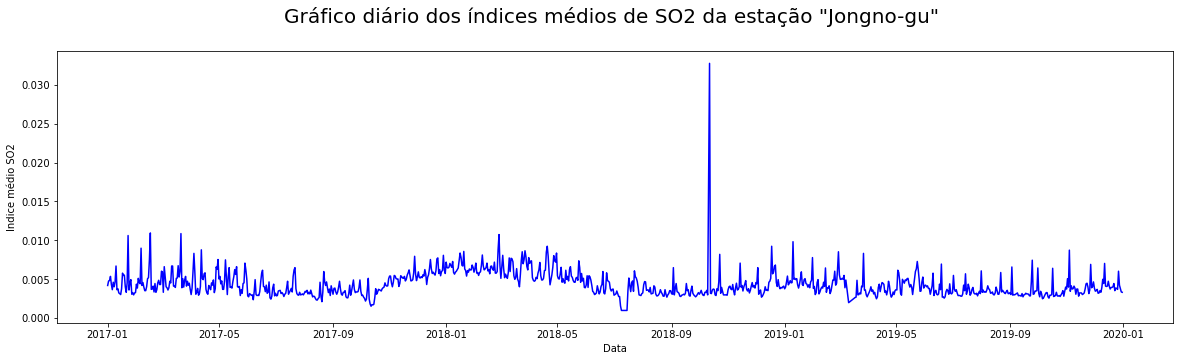

In [ ]:
# Agora sim, construindo o gráfico de linhas:
plt.figure(figsize = (20,5))
sns.lineplot(x = "Data", y = "Valor_medio", data = agrupado1, color = 'blue')
plt.title('Gráfico diário dos índices médios de SO2 da estação "Jongno-gu" \n', fontsize = 20)
plt.xlabel('Data')
plt.ylabel('Indice médio SO2')
plt.show()

In [ ]:
# Construindo um gráfico mensal dos índices médios O3 da estação "Dongdaemun-gu".
# Para isso, primeiramente é necessário selecionar as colunas que serão utilizadas para a plotagem ("Valor_medio" e "Data")

df_segundo_grafico = df_final.loc[:, ['Data','Valor_medio']][(df_final.loc[:, 'Nome_da_estacao_distrito'] == 'Dongdaemun-gu') & (df_final.loc[:, 'Nome_do_item'] == 'O3')]
df_segundo_grafico

,Data,Valor_medio
51,2017-01-01,0.002
201,2017-01-01,0.002
351,2017-01-01,0.002
501,2017-01-01,0.002
651,2017-01-01,0.002
...,...,...
3884362,2019-12-31,0.015
3884608,2019-12-31,0.017
3884719,2019-12-31,0.018
3884768,2019-12-31,0.014


In [ ]:
# Depois da seleção, é necessário agrupar por mês, já que o gráfico será mensal. 
# Então, uma nova coluna apenas com o mês e ano será adicionada ao df_segundo_grafico:

df_segundo_grafico['Mes_e_ano'] = df_segundo_grafico['Data'].dt.strftime('%Y-%m')

df_segundo_grafico

,Data,Valor_medio,Mes_e_ano
51,2017-01-01,0.002,2017-01
201,2017-01-01,0.002,2017-01
351,2017-01-01,0.002,2017-01
501,2017-01-01,0.002,2017-01
651,2017-01-01,0.002,2017-01
...,...,...,...
3884362,2019-12-31,0.015,2019-12
3884608,2019-12-31,0.017,2019-12
3884719,2019-12-31,0.018,2019-12
3884768,2019-12-31,0.014,2019-12


In [ ]:
# Agora, é necessário agrupar por mês, já que o gráfico será mensal:

agrupado2 = pd.DataFrame(df_segundo_grafico.groupby(by='Mes_e_ano')['Valor_medio'].mean()).reset_index()
agrupado2

,Mes_e_ano,Valor_medio
0,2017-01,0.012483
1,2017-02,0.015167
2,2017-03,0.023577
3,2017-04,0.031629
4,2017-05,0.034008
5,2017-06,0.035978
6,2017-07,0.029129
7,2017-08,0.017755
8,2017-09,0.020522
9,2017-10,0.014742


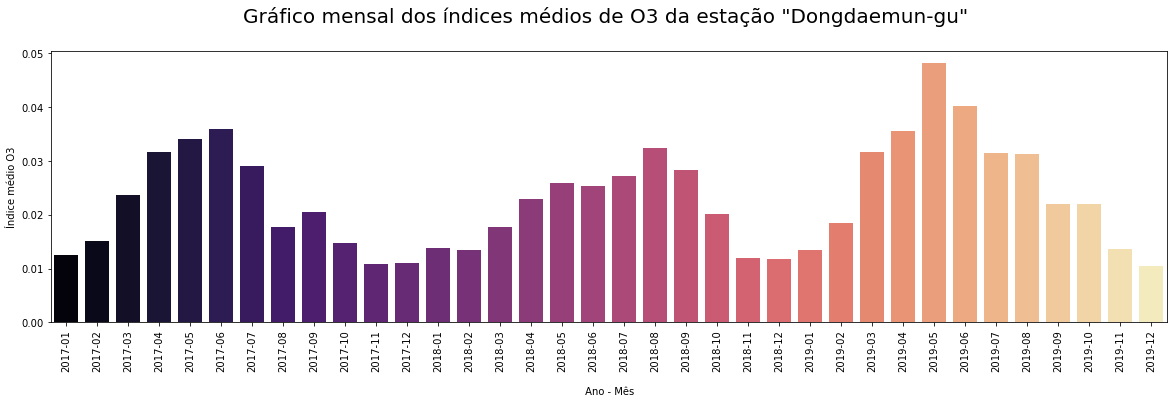

In [ ]:
# Agora sim, construindo o gráfico:

plt.figure(figsize = (20,5))
sns.barplot(x = 'Mes_e_ano', y = 'Valor_medio', data = agrupado2, palette = 'magma')
plt.title('Gráfico mensal dos índices médios de O3 da estação "Dongdaemun-gu" \n', fontsize = 20)
plt.xlabel('\n Ano - Mês')
plt.ylabel('Índice médio O3')
plt.xticks(rotation = 90)
plt.savefig('barras.png', format ='jpg')
plt.show()

In [ ]:
# Construindo um gráfico de barras com o ranking dos índices médios de SO2 por estação.
# Em primeiro lugar, é necessário selecionar as colunas que serão utilizadas para a plotagem ("Valor_medio"  e "Nome_da_estacao_distrito")"

df_terceiro_grafico = df_final.loc[:, ['Valor_medio', 'Nome_da_estacao_distrito']][df_final.loc[:, 'Nome_do_item'] == 'SO2']
df_terceiro_grafico

,Valor_medio,Nome_da_estacao_distrito
0,0.004,Jongno-gu
6,0.006,Jung-gu
12,0.005,Yongsan-gu
18,0.005,Eunpyeong-gu
24,0.005,Seodaemun-gu
...,...,...
3885044,0.003,Gangnam-gu
3885049,0.003,Yeongdeungpo-gu
3885051,0.003,Seocho-gu
3885053,0.002,Mapo-gu


In [ ]:
# Realizando o agrupamento pelo "Nome_da_estacao_distrito":

agrupado3 = pd.DataFrame(df_terceiro_grafico.groupby (by='Nome_da_estacao_distrito')['Valor_medio'].mean()).reset_index()
agrupado3

,Nome_da_estacao_distrito,Valor_medio
0,Dobong-gu,0.004249
1,Dongdaemun-gu,0.005420
2,Dongjak-gu,0.003639
3,Eunpyeong-gu,0.004254
4,Gangbuk-gu,0.003177
5,Gangdong-gu,0.004519
6,Gangnam-gu,0.005257
7,Gangseo-gu,0.005082
8,Geumcheon-gu,0.003936
9,Guro-gu,0.005650


In [ ]:
# Fazendo o ranking:

agrupado3.sort_values("Valor_medio", axis = 0, ascending = True, inplace = True)
agrupado3

,Nome_da_estacao_distrito,Valor_medio
4,Gangbuk-gu,0.003177
24,Yongsan-gu,0.003509
13,Jung-gu,0.003591
19,Seongbuk-gu,0.003629
2,Dongjak-gu,0.003639
8,Geumcheon-gu,0.003936
15,Mapo-gu,0.003945
21,Songpa-gu,0.004032
17,Seocho-gu,0.004199
0,Dobong-gu,0.004249


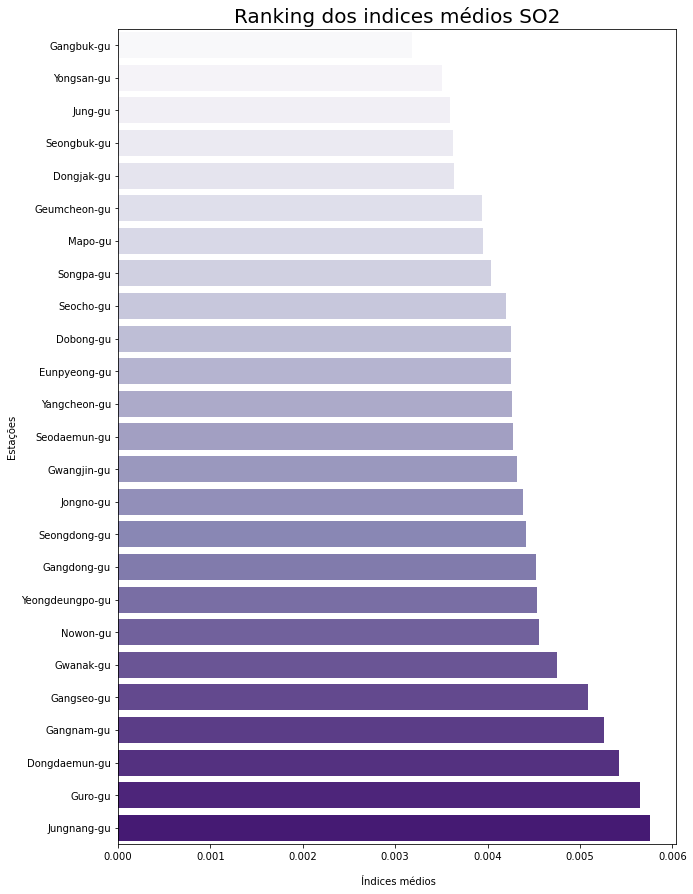

In [ ]:
# Agora sim, construindo o gráfico:

plt.figure(figsize = (10,15))
sns.barplot(data = agrupado3, x = 'Valor_medio', y = 'Nome_da_estacao_distrito', palette = 'Purples')
plt.title("Ranking dos indices médios SO2", fontsize = 20)
plt.xlabel("\n Índices médios")
plt.ylabel("Estações")
plt.show()

In [ ]:
# Construindo um boxplot da estação "Dobong-gu" dos índices médios de NO2 de acordo com o alerta (azul, verde, amarelo e vermelho)

# Para isso, teremos que criar uma nova coluna no "df_final" chamada "Qualidade"

for i in df2.Codigo_do_item.unique():
    # Filtros por código:
    teste = df2[df2.loc[:,'Codigo_do_item'] == i]
    
    # Filtros 
    df_final.loc[(df_final.loc[:,'Codigo_do_item'] == i) & (df_final.loc[:,'Valor_medio'] <= teste.iloc[0,3]),'Qualidade'] = df2.columns[3]
    df_final.loc[(df_final.loc[:,'Codigo_do_item'] == i) & (df_final.loc[:,'Valor_medio'] > teste.iloc[0,3]) & (df_final.loc[:,'Valor_medio'] <= teste.iloc[0,4]),'Qualidade'] = df2.columns[4]
    df_final.loc[(df_final.loc[:,'Codigo_do_item'] == i) & (df_final.loc[:,'Valor_medio'] > teste.iloc[0,4]) & (df_final.loc[:,'Valor_medio'] <= teste.iloc[0,5]),'Qualidade'] = df2.columns[5]
    df_final.loc[(df_final.loc[:,'Codigo_do_item'] == i) & (df_final.loc[:,'Valor_medio'] > teste.iloc[0,5]) & (df_final.loc[:,'Valor_medio'] <= teste.iloc[0,6]),'Qualidade'] = df2.columns[6]
    df_final.loc[(df_final.loc[:,'Codigo_do_item'] == i) & (df_final.loc[:,'Valor_medio'] > teste.iloc[0,6]),'Qualidade'] = df2.columns[6]

In [ ]:
df_final.head(10)

,Data_de_medicao,Codigo_da_estacao,Codigo_do_item,Valor_medio,Status_do_instrumento,Data,Hora,Nome_do_item,Unidade_de_medida,Bom_azul,Normal_verde,Ruim_amarelo,Muito_ruim_vermelho,Nome_da_estacao_distrito,Endereco,Latitude,Longitude,Qualidade
0,2017-01-01,101,1,0.004,0,2017-01-01,00:00:00,SO2,ppm,0.02,0.05,0.15,1.0,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,Bom_azul
1,2017-01-01,101,3,0.059,0,2017-01-01,00:00:00,NO2,ppm,0.03,0.06,0.20,2.0,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,Normal_verde
2,2017-01-01,101,5,1.200,0,2017-01-01,00:00:00,CO,ppm,2.00,9.00,15.00,50.0,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,Bom_azul
3,2017-01-01,101,6,0.002,0,2017-01-01,00:00:00,O3,ppm,0.03,0.09,0.15,0.5,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,Bom_azul
4,2017-01-01,101,8,73.000,0,2017-01-01,00:00:00,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,Normal_verde
5,2017-01-01,101,9,57.000,0,2017-01-01,00:00:00,PM2.5,Mircrogram/m3,15.00,35.00,75.00,500.0,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,Ruim_amarelo
6,2017-01-01,102,1,0.006,0,2017-01-01,00:00:00,SO2,ppm,0.02,0.05,0.15,1.0,Jung-gu,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,Bom_azul
7,2017-01-01,102,3,0.068,0,2017-01-01,00:00:00,NO2,ppm,0.03,0.06,0.20,2.0,Jung-gu,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,Ruim_amarelo
8,2017-01-01,102,5,1.300,0,2017-01-01,00:00:00,CO,ppm,2.00,9.00,15.00,50.0,Jung-gu,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,Bom_azul
9,2017-01-01,102,6,0.002,0,2017-01-01,00:00:00,O3,ppm,0.03,0.09,0.15,0.5,Jung-gu,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,Bom_azul


In [ ]:
df_final.Qualidade.unique()

array(['Bom_azul', 'Normal_verde', 'Ruim_amarelo', 'Muito_ruim_vermelho',
       nan], dtype=object)

In [ ]:
# Agora, é necessário selecionar as colunas que serão utilizadas para a plotagem ("Valor_medio"  e "Nome_da_estacao_distrito")"

df_boxplot = df_final.loc[:,["Data","Qualidade","Valor_medio"]][(df_final.loc[:,"Nome_da_estacao_distrito"]=="Dobong-gu") & (df_final.loc[:,"Nome_do_item"]=="NO2")].sort_values(by="Valor_medio")
df_boxplot

,Data,Qualidade,Valor_medio
1669723,2018-04-09,Bom_azul,0.0
2410573,2018-11-01,Bom_azul,0.0
1682923,2018-04-13,Bom_azul,0.0
1682773,2018-04-13,Bom_azul,0.0
1682623,2018-04-13,Bom_azul,0.0
...,...,...,...
3584690,2019-10-09,NaN,NaN
3584845,2019-10-09,NaN,NaN
3584994,2019-10-09,NaN,NaN
3585137,2019-10-09,NaN,NaN


In [ ]:
# Organizando a paleta de cores:

paleta = {Qualidade: "blue" if Qualidade == "Bom_azul" 
              else "green" if Qualidade == "Normal_verde"
              else "yellow" if Qualidade == "Ruim_amarelo" 
              else "red" for Qualidade in df_boxplot.Qualidade.unique()}

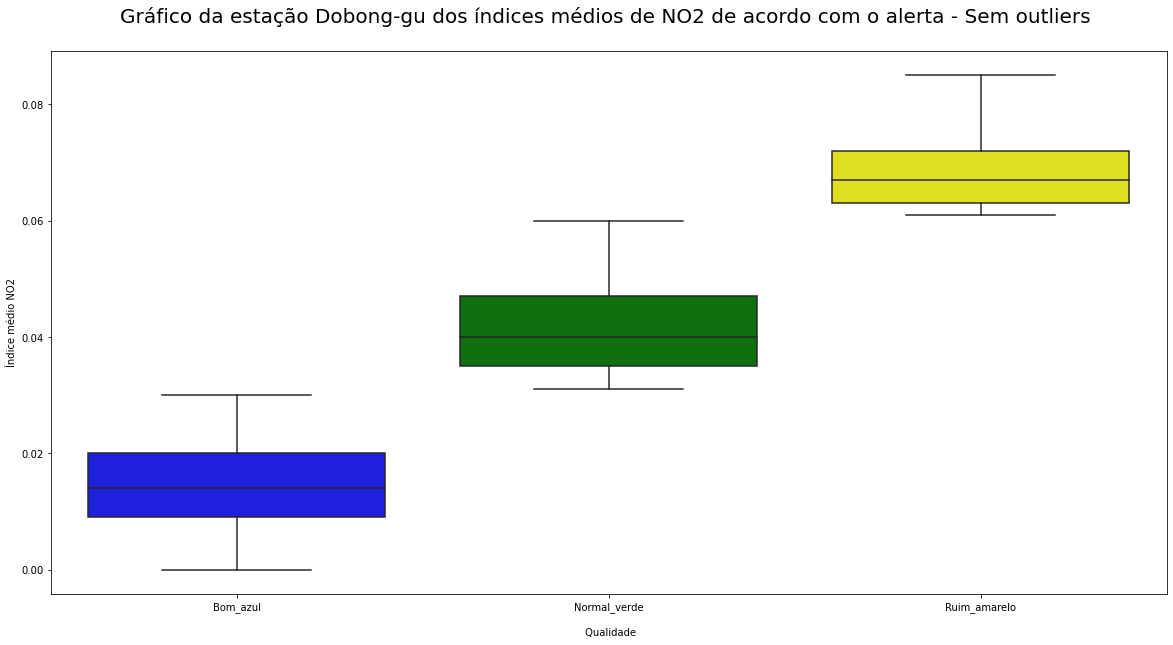

In [ ]:
# Agora sim, plotando o Boxplot:

plt.figure(figsize = (20,10))
sns.boxplot(data = df_boxplot, x = "Qualidade", y = "Valor_medio", showfliers = False , palette = paleta)
plt.title("Gráfico da estação Dobong-gu dos índices médios de NO2 de acordo com o alerta - Sem outliers \n", fontsize = 20)
plt.xlabel("\n Qualidade")
plt.ylabel("Índice médio NO2")
plt.show()

In [ ]:
# Construindo resumos estatísticos da base única dos anos de 2017, 2018 e 2019.
# Então, é preciso utilizar o df_final e extrair somente o ano da coluna 'Data de medição' para ser armazenado em uma nova coluna:

df_final['Ano'] = df1['Data_de_medicao'].dt.strftime('%Y')
df_final


,Data_de_medicao,Codigo_da_estacao,Codigo_do_item,Valor_medio,Status_do_instrumento,Data,Hora,Nome_do_item,Unidade_de_medida,Bom_azul,Normal_verde,Ruim_amarelo,Muito_ruim_vermelho,Nome_da_estacao_distrito,Endereco,Latitude,Longitude,Qualidade,Ano
0,2017-01-01 00:00:00,101,1,0.004,0,2017-01-01,00:00:00,SO2,ppm,0.02,0.05,0.15,1.0,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,Bom_azul,2017
1,2017-01-01 00:00:00,101,3,0.059,0,2017-01-01,00:00:00,NO2,ppm,0.03,0.06,0.20,2.0,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,Normal_verde,2017
2,2017-01-01 00:00:00,101,5,1.200,0,2017-01-01,00:00:00,CO,ppm,2.00,9.00,15.00,50.0,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,Bom_azul,2017
3,2017-01-01 00:00:00,101,6,0.002,0,2017-01-01,00:00:00,O3,ppm,0.03,0.09,0.15,0.5,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,Bom_azul,2017
4,2017-01-01 00:00:00,101,8,73.000,0,2017-01-01,00:00:00,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,Normal_verde,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885061,2019-12-31 23:00:00,123,9,13.000,0,2019-12-31,23:00:00,PM2.5,Mircrogram/m3,15.00,35.00,75.00,500.0,Gangnam-gu,"426, Hakdong-ro, Gangnam-gu, Seoul, Republic o...",37.517528,127.047470,Bom_azul,2019
3885062,2019-12-31 23:00:00,118,9,24.000,0,2019-12-31,23:00:00,PM2.5,Mircrogram/m3,15.00,35.00,75.00,500.0,Geumcheon-gu,"20, Geumha-ro 21-gil, Geumcheon-gu, Seoul, Rep...",37.452357,126.908296,Normal_verde,2019
3885063,2019-12-31 23:00:00,105,8,19.000,0,2019-12-31,23:00:00,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0,Seodaemun-gu,"32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...",37.593742,126.949679,Bom_azul,2019
3885064,2019-12-31 23:00:00,125,3,0.037,0,2019-12-31,23:00:00,NO2,ppm,0.03,0.06,0.20,2.0,Gangdong-gu,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,Normal_verde,2019


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3885066 entries, 0 to 3885065
Data columns (total 19 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Data_de_medicao           datetime64[ns]
 1   Codigo_da_estacao         int64         
 2   Codigo_do_item            int64         
 3   Valor_medio               float64       
 4   Status_do_instrumento     int64         
 5   Data                      datetime64[ns]
 6   Hora                      object        
 7   Nome_do_item              object        
 8   Unidade_de_medida         object        
 9   Bom_azul                  float64       
 10  Normal_verde              float64       
 11  Ruim_amarelo              float64       
 12  Muito_ruim_vermelho       float64       
 13  Nome_da_estacao_distrito  object        
 14  Endereco                  object        
 15  Latitude                  float64       
 16  Longitude                 float64       
 17  Qualidad

In [ ]:
df_2017 = df_final.loc[:,:][df_final.loc[:, 'Ano'] == '2017']
df_2017.describe()

,Codigo_da_estacao,Codigo_do_item,Valor_medio,Status_do_instrumento,Bom_azul,Normal_verde,Ruim_amarelo,Muito_ruim_vermelho,Latitude,Longitude
count,1.314000e+06,1.314000e+06,1.311906e+06,1.314000e+06,1.314000e+06,1.314000e+06,1.314000e+06,1.314000e+06,1.314000e+06,1.314000e+06
mean,1.130000e+02,5.333333e+00,1.160629e+01,1.037557e-01,7.846667e+00,2.070000e+01,4.008333e+01,1.922500e+02,3.755349e+01,1.269893e+02
std,7.211105e+00,2.748738e+00,3.043546e+01,8.841571e-01,1.125153e+01,2.925485e+01,5.584213e+01,2.551944e+02,5.327431e-02,7.878802e-02
min,1.010000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e-02,5.000000e-02,1.500000e-01,5.000000e-01,3.745236e+01,1.268352e+02
25%,1.070000e+02,3.000000e+00,1.300000e-02,0.000000e+00,3.000000e-02,6.000000e-02,1.500000e-01,1.000000e+00,3.751753e+01,1.269271e+02
50%,1.130000e+02,5.500000e+00,7.800000e-02,0.000000e+00,1.015000e+00,4.545000e+00,7.600000e+00,2.600000e+01,3.754496e+01,1.270049e+02
75%,1.190000e+02,8.000000e+00,1.700000e+01,0.000000e+00,1.500000e+01,3.500000e+01,7.500000e+01,5.000000e+02,3.758485e+01,1.270475e+02
max,1.250000e+02,9.000000e+00,3.403000e+03,9.000000e+00,3.000000e+01,8.000000e+01,1.500000e+02,6.000000e+02,3.765877e+01,1.271368e+02


In [ ]:
df_2018 = df_final.loc[:,:][df_final.loc[:, 'Ano'] == '2018']
df_2018.describe()

,Codigo_da_estacao,Codigo_do_item,Valor_medio,Status_do_instrumento,Bom_azul,Normal_verde,Ruim_amarelo,Muito_ruim_vermelho,Latitude,Longitude
count,1.314000e+06,1.314000e+06,1.307277e+06,1.314000e+06,1.314000e+06,1.314000e+06,1.314000e+06,1.314000e+06,1.314000e+06,1.314000e+06
mean,1.130000e+02,5.333333e+00,1.113418e+01,1.662998e-01,7.846667e+00,2.070000e+01,4.008333e+01,1.922500e+02,3.755349e+01,1.269893e+02
std,7.211105e+00,2.748738e+00,3.921757e+01,1.099090e+00,1.125153e+01,2.925485e+01,5.584213e+01,2.551944e+02,5.327431e-02,7.878802e-02
min,1.010000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e-02,5.000000e-02,1.500000e-01,5.000000e-01,3.745236e+01,1.268352e+02
25%,1.070000e+02,3.000000e+00,1.200000e-02,0.000000e+00,3.000000e-02,6.000000e-02,1.500000e-01,1.000000e+00,3.751753e+01,1.269271e+02
50%,1.130000e+02,5.500000e+00,7.500000e-02,0.000000e+00,1.015000e+00,4.545000e+00,7.600000e+00,2.600000e+01,3.754496e+01,1.270049e+02
75%,1.190000e+02,8.000000e+00,1.300000e+01,0.000000e+00,1.500000e+01,3.500000e+01,7.500000e+01,5.000000e+02,3.758485e+01,1.270475e+02
max,1.250000e+02,9.000000e+00,6.256000e+03,9.000000e+00,3.000000e+01,8.000000e+01,1.500000e+02,6.000000e+02,3.765877e+01,1.271368e+02


In [ ]:
df_2019 = df_final.loc[:,:][df_final.loc[:, 'Ano'] == '2019']
df_2019.describe()

,Codigo_da_estacao,Codigo_do_item,Valor_medio,Status_do_instrumento,Bom_azul,Normal_verde,Ruim_amarelo,Muito_ruim_vermelho,Latitude,Longitude
count,1.257066e+06,1.257066e+06,1.242043e+06,1.257066e+06,1.257066e+06,1.257066e+06,1.257066e+06,1.257066e+06,1.257066e+06,1.257066e+06
mean,1.130007e+02,5.333333e+00,1.236091e+01,1.726131e-01,7.846667e+00,2.070000e+01,4.008333e+01,1.922500e+02,3.755348e+01,1.269893e+02
std,7.211745e+00,2.748738e+00,4.420476e+01,1.069091e+00,1.125153e+01,2.925485e+01,5.584213e+01,2.551944e+02,5.326993e-02,7.879469e-02
min,1.010000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e-02,5.000000e-02,1.500000e-01,5.000000e-01,3.745236e+01,1.268352e+02
25%,1.070000e+02,3.000000e+00,1.200000e-02,0.000000e+00,3.000000e-02,6.000000e-02,1.500000e-01,1.000000e+00,3.751753e+01,1.269271e+02
50%,1.130000e+02,5.500000e+00,7.400000e-02,0.000000e+00,1.015000e+00,4.545000e+00,7.600000e+00,2.600000e+01,3.754496e+01,1.270049e+02
75%,1.190000e+02,8.000000e+00,1.500000e+01,0.000000e+00,1.500000e+01,3.500000e+01,7.500000e+01,5.000000e+02,3.758485e+01,1.270475e+02
max,1.250000e+02,9.000000e+00,1.985000e+03,9.000000e+00,3.000000e+01,8.000000e+01,1.500000e+02,6.000000e+02,3.765877e+01,1.271368e+02
